In [1]:
# !pip install pandas numpy matplotlib statsmodels pandas_datareader datetime yfinance scikit-learn PyPortfolioOpt pandas-ta

In [2]:
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import pandas as pd 
import numpy as np 
import datetime as dt 
import yfinance as yf 
import pandas_ta
import warnings 
warnings.filterwarnings('ignore')

In [3]:
import yfinance as yf
import pandas as pd

# Define the list of cryptocurrency symbols
# crypto_symbols = ["BTC-USD", "ETH-USD", "USDT-USD", "BNB-USD", "SOL-USD", "XRP-USD", "USDC-USD", "ADA-USD", "AVAX-USD", "DOGE-USD",
#                    "LINK-USD", "TRX-USD", "DOT-USD", "MATIC-USD", "TONCOIN-USD", "WBTC-USD", "ICP-USD", "SHIB-USD", "DAI-USD", "LTC-USD",
#                    "BCH-USD", "LEO-USD", "UNI-USD", "ETC-USD", "ATOM-USD", "APT-USD", "XLM-USD", "XMR-USD", "IMX-USD", "TIA-USD", 
#                    "OKB-USD", "NEAR-USD", "INJ-USD", "OP-USD", "FIL-USD", "FDUSD-USD", "LDO-USD", "HBAR-USD", "KAS-USD", "ARB-USD", 
#                    "STX-USD", "CRO-USD", "VET-USD", "MNT-USD", "MKR-USD", "RNDR-USD", "SUI-USD", "SEI-USD", "GRT-USD", "RUNE-USD"]

crypto_symbols = ["BTC-USD", "ETH-USD", "USDT-USD", "BNB-USD", "SOL-USD", "XRP-USD", "USDC-USD", "ADA-USD", "AVAX-USD", "DOGE-USD",
                   "LINK-USD", "TRX-USD", "DOT-USD", "MATIC-USD", "TONCOIN-USD", "WBTC-USD", "ICP-USD", "SHIB-USD", "DAI-USD", "LTC-USD",
                   "BCH-USD", "LEO-USD", "UNI-USD", "ETC-USD", "ATOM-USD", "APT-USD", "XLM-USD", "XMR-USD", "IMX-USD", "TIA-USD", 
                   "OKB-USD", "NEAR-USD", "INJ-USD", "OP-USD", "FIL-USD", "FDUSD-USD", "LDO-USD", "HBAR-USD", "KAS-USD", "ARB-USD", 
                   "STX-USD", "CRO-USD", "VET-USD", "MNT-USD", "MKR-USD", "RNDR-USD", "SUI-USD", "SEI-USD", "GRT-USD", "RUNE-USD",
                   "HEX-USD", "ALGO-USD", "MINA-USD", "AAVE-USD", "QNT-USD", "HNT-USD", "ORDI-USD", "FLOW-USD", "ASTR-USD", "FTM-USD",
                   "THETA-USD", "SAND-USD", "AXS-USD", "XTZ-USD", "FLR-USD", "KCS-USD", "SNX-USD", "RON-USD", "CHZ-USD", "BGB-USD",
                   "SATS-USD", "BEAM-USD", "CHEEL-USD", "WEMIX-USD", "MANA-USD", "DYDX-USD", "CFX-USD", "ROSE-USD", "EOS-USD", "BTT-USD",
                   "FXS-USD", "NEO-USD", "OSMO-USD", "IOTA-USD", "KAVA-USD", "PYTH-USD", "JUP-USD", "BLUR-USD", "USDD-USD"]

crypto_symbols += ["MANTA-USD", "WBNB-USD", "PENDLE-USD", "KLAY-USD", "FRAX-USD", "BONK-USD", "WOO-USD", "CAKE-USD", "AKT-USD",
                   "MSOL-USD", "XDC-USD", "GALA-USD", "VBNB-USD", "XEC-USD", "LUNC-USD", "FTT-USD", "GNO-USD", "RPL-USD",
                   "AR-USD", "ENS-USD", "APE18876-USD", "XAUT-USD", "AXL17799-USD", "CRV-USD", "SC-USD", "NEXO-USD",
                   "CBETH-USD", "TWT-USD", "HT-USD", "GT-USD", "RLB-USD", "1INCH-USD", "FET-USD", "FTN-USD", "STRD-USD",
                   "COMP5692-USD", "GMT18069-USD", "PAXG-USD", "CSPR-USD", "XRD-USD", "LUNA20314-USD", "CORE23254-USD",
                   "NFT9816-USD", "GMX11857-USD", "BTG-USD", "ELF-USD", "ENJ-USD", "KUJI-USD", "PEPE24478-USD", "METIS-USD",
                   "IOTX-USD", "GAS-USD", "SKL-USD", "WKAVA-USD", "ZEC-USD", "USDP-USD", "AGIX-USD", "CELO-USD", "ZIL-USD",
                   "POKT-USD", "MAGIC14783-USD", "ALT29073-USD", "UMA-USD", "ORBR-USD", "BAT-USD", "HOT2682-USD", "KSM-USD",
                   "DASH-USD", "MASK8536-USD", "XEM-USD", "LRC-USD", "DESO-USD", "AZERO-USD", "PYUSD-USD", "QTUM-USD",
                   "HBTC-USD", "XCH-USD", "SSV-USD", "NTRN26680-USD", "TRB-USD", "SUPER8290-USD", "GLMR-USD", "ONDO-USD",
                   "API3-USD", "ETHW-USD", "SFP-USD", "MX-USD", "WLD-USD", "ILV-USD", "CVX-USD", "TRAC-USD", "ZRX-USD",
                   "TFUEL-USD", "BDX-USD", "ADF-USD", "FLOKI-USD", "RAY-USD", "JASMY-USD", "LYX-USD", "JST-USD"]



# Define start and end dates
end_date = '2023-09-27'
start_date = pd.to_datetime(end_date) - pd.DateOffset(days=365*8)

# Download historical data for the specified symbols and date range
crypto_data = yf.download(tickers=crypto_symbols, start=start_date, end=end_date).stack(level=1)
crypto_data.index.names = ['Date', 'Ticker']  # Set the column headings for the index levels

# Display the downloaded data
print(crypto_data.head())

[*********************100%%**********************]  189 of 189 completed


5 Failed downloads:
['ONDO-USD', 'ALT29073-USD', 'MANTA-USD']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
['IOTA-USD', 'PYTH-USD']: Exception("%ticker%: Data doesn't exist for startDate = 1443484800, endDate = 1695772800")



                     Adj Close       Close        High         Low  \
Date       Ticker                                                    
2015-09-29 BTC-USD  236.686996  236.686996  239.802002  235.927994   
           LTC-USD    2.969990    2.969990    3.172000    2.969990   
2015-09-30 BTC-USD  236.059998  236.059998  237.733994  235.628998   
           LTC-USD    3.009780    3.009780    3.049180    2.966090   
2015-10-01 BTC-USD  237.548996  237.548996  238.445007  235.615997   

                          Open      Volume  
Date       Ticker                           
2015-09-29 BTC-USD  239.016006  22691300.0  
           LTC-USD    3.102650   2896120.0  
2015-09-30 BTC-USD  236.639999  19743500.0  
           LTC-USD    2.966090   1371090.0  
2015-10-01 BTC-USD  236.003998  20488800.0  


In [4]:
crypto_data

Adj Close       Close        High         Low  \
Date       Ticker                                                    
2015-09-29 BTC-USD  236.686996  236.686996  239.802002  235.927994   
           LTC-USD    2.969990    2.969990    3.172000    2.969990   
2015-09-30 BTC-USD  236.059998  236.059998  237.733994  235.628998   
           LTC-USD    3.009780    3.009780    3.049180    2.966090   
2015-10-01 BTC-USD  237.548996  237.548996  238.445007  235.615997   
...                        ...         ...         ...         ...   
2023-09-26 XRP-USD    0.501708    0.501708    0.506655    0.498804   
           XTZ-USD    0.655199    0.655199    0.660204    0.650488   
           ZEC-USD   26.213961   26.213961   26.343584   25.841721   
           ZIL-USD    0.017007    0.017007    0.017180    0.016667   
           ZRX-USD    0.182523    0.182523    0.183432    0.180333   

                          Open       Volume  
Date       Ticker                            
2015-09-29 BTC-USD  239.016006   22691300.0  
           LTC-USD    3.102650    2896120.0  
2015-09-30 BTC-USD  236.639999   19743500.0  
           LTC-USD    2.966090    1371090.0  
2015-10-01 BTC-USD  236.003998   20488800.0  
...                        ...          ...  
2023-09-26 XRP-USD    0.505455  782380755.0  
           XTZ-USD    0.657982   11975662.0  
           ZEC-USD   26.130634   33059159.0  
           ZIL-USD    0.016864    9843525.0  
           ZRX-USD    0.182834   15314786.0  

[230237 rows x 6 columns]

In [5]:
crypto_data.index.names = ["date", 'ticker']
crypto_data.columns = crypto_data.columns.str.lower()
crypto_data

adj close       close        high         low  \
date       ticker                                                    
2015-09-29 BTC-USD  236.686996  236.686996  239.802002  235.927994   
           LTC-USD    2.969990    2.969990    3.172000    2.969990   
2015-09-30 BTC-USD  236.059998  236.059998  237.733994  235.628998   
           LTC-USD    3.009780    3.009780    3.049180    2.966090   
2015-10-01 BTC-USD  237.548996  237.548996  238.445007  235.615997   
...                        ...         ...         ...         ...   
2023-09-26 XRP-USD    0.501708    0.501708    0.506655    0.498804   
           XTZ-USD    0.655199    0.655199    0.660204    0.650488   
           ZEC-USD   26.213961   26.213961   26.343584   25.841721   
           ZIL-USD    0.017007    0.017007    0.017180    0.016667   
           ZRX-USD    0.182523    0.182523    0.183432    0.180333   

                          open       volume  
date       ticker                            
2015-09-29 BTC-USD  239.016006   22691300.0  
           LTC-USD    3.102650    2896120.0  
2015-09-30 BTC-USD  236.639999   19743500.0  
           LTC-USD    2.966090    1371090.0  
2015-10-01 BTC-USD  236.003998   20488800.0  
...                        ...          ...  
2023-09-26 XRP-USD    0.505455  782380755.0  
           XTZ-USD    0.657982   11975662.0  
           ZEC-USD   26.130634   33059159.0  
           ZIL-USD    0.016864    9843525.0  
           ZRX-USD    0.182834   15314786.0  

[230237 rows x 6 columns]

In [6]:
crypto_data["rsi"] = crypto_data.groupby(level = 1)['adj close'].transform(lambda x : pandas_ta.rsi(close =x, length = 20))
crypto_data

adj close       close        high         low  \
date       ticker                                                    
2015-09-29 BTC-USD  236.686996  236.686996  239.802002  235.927994   
           LTC-USD    2.969990    2.969990    3.172000    2.969990   
2015-09-30 BTC-USD  236.059998  236.059998  237.733994  235.628998   
           LTC-USD    3.009780    3.009780    3.049180    2.966090   
2015-10-01 BTC-USD  237.548996  237.548996  238.445007  235.615997   
...                        ...         ...         ...         ...   
2023-09-26 XRP-USD    0.501708    0.501708    0.506655    0.498804   
           XTZ-USD    0.655199    0.655199    0.660204    0.650488   
           ZEC-USD   26.213961   26.213961   26.343584   25.841721   
           ZIL-USD    0.017007    0.017007    0.017180    0.016667   
           ZRX-USD    0.182523    0.182523    0.183432    0.180333   

                          open       volume        rsi  
date       ticker                                       
2015-09-29 BTC-USD  239.016006   22691300.0        NaN  
           LTC-USD    3.102650    2896120.0        NaN  
2015-09-30 BTC-USD  236.639999   19743500.0        NaN  
           LTC-USD    2.966090    1371090.0        NaN  
2015-10-01 BTC-USD  236.003998   20488800.0        NaN  
...                        ...          ...        ...  
2023-09-26 XRP-USD    0.505455  782380755.0  43.780502  
           XTZ-USD    0.657982   11975662.0  41.520083  
           ZEC-USD   26.130634   33059159.0  50.939250  
           ZIL-USD    0.016864    9843525.0  49.675172  
           ZRX-USD    0.182834   15314786.0  50.164904  

[230237 rows x 7 columns]

In [7]:
# We need to create a function to calculate the Average True Range(ATR)

def compute_atr(stock_data):
    atr = pandas_ta.atr(high= stock_data['high'],
    low = stock_data['low'],
    close =stock_data['close'],
    length=14)
    return atr.sub(atr.mean()).div(atr.std())
# the pandas_ta.art() method requires High, low, close and period data to be specified
# we dont return the atr value directly, instead we normalise the atr value by subtracting the mean value and dividing by standard dev
# why do we normalise ? Because we want to feed this to an ML model and do clustering later for which data needs to be normalised

crypto_data['atr']= crypto_data.groupby(level=1, group_keys = False).apply(compute_atr)

In [8]:
crypto_data

adj close       close        high         low  \
date       ticker                                                    
2015-09-29 BTC-USD  236.686996  236.686996  239.802002  235.927994   
           LTC-USD    2.969990    2.969990    3.172000    2.969990   
2015-09-30 BTC-USD  236.059998  236.059998  237.733994  235.628998   
           LTC-USD    3.009780    3.009780    3.049180    2.966090   
2015-10-01 BTC-USD  237.548996  237.548996  238.445007  235.615997   
...                        ...         ...         ...         ...   
2023-09-26 XRP-USD    0.501708    0.501708    0.506655    0.498804   
           XTZ-USD    0.655199    0.655199    0.660204    0.650488   
           ZEC-USD   26.213961   26.213961   26.343584   25.841721   
           ZIL-USD    0.017007    0.017007    0.017180    0.016667   
           ZRX-USD    0.182523    0.182523    0.183432    0.180333   

                          open       volume        rsi       atr  
date       ticker                                                 
2015-09-29 BTC-USD  239.016006   22691300.0        NaN       NaN  
           LTC-USD    3.102650    2896120.0        NaN       NaN  
2015-09-30 BTC-USD  236.639999   19743500.0        NaN       NaN  
           LTC-USD    2.966090    1371090.0        NaN       NaN  
2015-10-01 BTC-USD  236.003998   20488800.0        NaN       NaN  
...                        ...          ...        ...       ...  
2023-09-26 XRP-USD    0.505455  782380755.0  43.780502 -0.527880  
           XTZ-USD    0.657982   11975662.0  41.520083 -0.927770  
           ZEC-USD   26.130634   33059159.0  50.939250 -0.664998  
           ZIL-USD    0.016864    9843525.0  49.675172 -0.720012  
           ZRX-USD    0.182834   15314786.0  50.164904 -0.806073  

[230237 rows x 8 columns]

In [9]:
crypto_data['dollar_volume'] = (crypto_data['adj close']*crypto_data['volume'])/1e6
## dollar vol is simple to calc, we div by 1e6 because there is millions of dollars traded everyday, for viewing simplicity
crypto_data

adj close       close        high         low  \
date       ticker                                                    
2015-09-29 BTC-USD  236.686996  236.686996  239.802002  235.927994   
           LTC-USD    2.969990    2.969990    3.172000    2.969990   
2015-09-30 BTC-USD  236.059998  236.059998  237.733994  235.628998   
           LTC-USD    3.009780    3.009780    3.049180    2.966090   
2015-10-01 BTC-USD  237.548996  237.548996  238.445007  235.615997   
...                        ...         ...         ...         ...   
2023-09-26 XRP-USD    0.501708    0.501708    0.506655    0.498804   
           XTZ-USD    0.655199    0.655199    0.660204    0.650488   
           ZEC-USD   26.213961   26.213961   26.343584   25.841721   
           ZIL-USD    0.017007    0.017007    0.017180    0.016667   
           ZRX-USD    0.182523    0.182523    0.183432    0.180333   

                          open       volume        rsi       atr  \
date       ticker                                                  
2015-09-29 BTC-USD  239.016006   22691300.0        NaN       NaN   
           LTC-USD    3.102650    2896120.0        NaN       NaN   
2015-09-30 BTC-USD  236.639999   19743500.0        NaN       NaN   
           LTC-USD    2.966090    1371090.0        NaN       NaN   
2015-10-01 BTC-USD  236.003998   20488800.0        NaN       NaN   
...                        ...          ...        ...       ...   
2023-09-26 XRP-USD    0.505455  782380755.0  43.780502 -0.527880   
           XTZ-USD    0.657982   11975662.0  41.520083 -0.927770   
           ZEC-USD   26.130634   33059159.0  50.939250 -0.664998   
           ZIL-USD    0.016864    9843525.0  49.675172 -0.720012   
           ZRX-USD    0.182834   15314786.0  50.164904 -0.806073   

                    dollar_volume  
date       ticker                  
2015-09-29 BTC-USD    5370.735643  
           LTC-USD       8.601447  
2015-09-30 BTC-USD    4660.650562  
           LTC-USD       4.126679  
2015-10-01 BTC-USD    4867.093869  
...                           ...  
2023-09-26 XRP-USD     392.526661  
           XTZ-USD       7.846442  
           ZEC-USD     866.611493  
           ZIL-USD       0.167409  
           ZRX-USD       2.795301  

[230237 rows x 9 columns]

In [10]:
last_cols = [c for c in crypto_data.columns.unique(0) if c not in ['dollar_volume', 'open', 'high', 'low', 'close', 'volume']]
last_cols
data = (pd.concat([crypto_data.unstack('ticker')['dollar_volume'].resample('M').mean().stack('ticker').to_frame('dollar_volume'), crypto_data.unstack()[last_cols].resample('M').last().stack('ticker')], axis = 1)).dropna()
data

dollar_volume   adj close        rsi       atr
date       ticker                                                       
2015-10-31 BTC-USD          8483.125526  314.165985  76.020006 -0.814545
           LTC-USD             7.384063    3.804330  71.897497 -0.801743
2015-11-30 BTC-USD         26320.617581  377.321014  63.830446 -0.807104
           LTC-USD            17.147836    3.621220  56.838819 -0.800182
2015-12-31 BTC-USD         28874.240487  430.566986  55.716238 -0.807143
...                                 ...         ...        ...       ...
2023-09-30 NTRN26680-USD       0.088621    0.383939  57.054047 -1.517653
           LYX-USD             0.613575    5.209575  33.370358 -1.634919
           FDUSD-USD         298.368774    0.999170  43.202322 -1.365117
           SEI-USD             9.025038    0.117255  39.396057 -1.383475
           PYUSD-USD           2.981343    1.001003   0.001171 -1.128052

[7567 rows x 4 columns]

In [11]:
data['dollar_volume'] = (data.loc[:, 'dollar_volume'].unstack('ticker').rolling(5*12, min_periods=12).mean().stack())
# above accesses all the data in the dol_vol col and unstacks it by ticker level; so we get all the data of one stock at a time.
# then on this data first we define the rolling period which is 5 years; since previously we have aggregated at monthly level
# we do 5*12 and then take the mean. (mean will be of the dol_vol for the past 60 months (5*12))
data['dollar_volume_rank'] = (data.groupby('date')['dollar_volume'].rank(ascending = False))
# now we need to rank the stocks based on their dollar_vol; the above does the following
# first takes the previous unstacked data nad groups it by date; i.e on a montly level
# then it ranks the datapoints (stocks) based on the dollar_vol
data = data[data['dollar_volume_rank']<150].drop(['dollar_volume', 'dollar_volume_rank'], axis=1)
data

adj close        rsi       atr
date       ticker                                         
2016-09-30 BTC-USD         609.734985  53.920080 -0.819216
           LTC-USD           3.841600  49.407928 -0.814114
2016-10-31 BTC-USD         700.971985  73.178462 -0.813760
           LTC-USD           3.993960  55.942726 -0.813054
2016-11-30 BTC-USD         745.690979  60.975434 -0.810924
...                               ...        ...       ...
2023-09-30 LUNA20314-USD     0.445715  54.437460 -0.769437
           KAS-USD           0.046829  56.656141  1.268014
           ETHW-USD          1.323782  42.952672 -0.448198
           CBETH-USD      1671.267944  41.348442 -1.592906
           AXL17799-USD      0.339437  42.145586 -1.084575

[5567 rows x 3 columns]

In [12]:
def calculate_returns(df):
    lags = [1, 2, 3, 6, 9, 12]
    outlier_cutoff = 0.005
    for lag in lags:
        df[f'return_{lag}m'] = (df['adj close'].pct_change(lag)
                                .pipe(lambda x: x.clip(lower = x.quantile(outlier_cutoff),
                                upper = x.quantile(1-outlier_cutoff)))
                                .add(1)
                                .pow(1/lag)
                                .sub(1))
    return df
# Applying the procedure on the experimented AAPL case to a function so that it can be used throughout

In [13]:
data = data.groupby(level =1, group_keys = False).apply(calculate_returns).dropna()
# APply the return calculating fucntion to all the stocks in the data dataframe (by grouping at level 1). Following that we drop all rows which have an NaN value
data

adj close        rsi       atr  return_1m  \
date       ticker                                                       
2017-09-30 BTC-USD        4338.709961  56.594815 -0.548570  -0.077536   
           LTC-USD          55.142399  50.301453 -0.051603  -0.223949   
2017-10-31 BTC-USD        6468.399902  69.956562 -0.510747   0.490858   
           LTC-USD          55.754101  49.217995 -0.359934   0.011093   
2017-11-30 BTC-USD       10233.599609  75.302612 -0.132269   0.582091   
...                               ...        ...       ...        ...   
2023-09-30 DESO-USD          8.257385  35.470721 -0.734548  -0.085211   
           BGB-USD           0.447343  51.930242 -0.557989   0.048794   
           DYDX-USD          1.876544  43.419893 -0.621732  -0.150823   
           GMX11857-USD     35.424183  47.815106 -1.113523   0.011970   
           OSMO-USD          0.315435  28.472579 -0.792730  -0.126932   

                         return_2m  return_3m  return_6m  return_9m  \
date       ticker                                                     
2017-09-30 BTC-USD        0.228388   0.204816   0.262433   0.181952   
           LTC-USD        0.132124   0.109682   0.422084   0.326875   
2017-10-31 BTC-USD        0.172716   0.310295   0.298745   0.234634   
           LTC-USD       -0.114190   0.090251   0.235105   0.337198   
2017-11-30 BTC-USD        0.512918   0.295803   0.283746   0.271276   
...                            ...        ...        ...        ...   
2023-09-30 DESO-USD      -0.026056   0.000716  -0.047282   0.028589   
           BGB-USD       -0.016493  -0.028686   0.020486   0.105281   
           DYDX-USD      -0.060472  -0.031493  -0.047287   0.060668   
           GMX11857-USD  -0.192647  -0.139720  -0.119449  -0.017616   
           OSMO-USD      -0.188313  -0.139121  -0.144205  -0.082605   

                         return_12m  
date       ticker                    
2017-09-30 BTC-USD         0.177656  
           LTC-USD         0.248574  
2017-10-31 BTC-USD         0.203441  
           LTC-USD         0.245679  
2017-11-30 BTC-USD         0.243910  
...                             ...  
2023-09-30 DESO-USD       -0.009503  
           BGB-USD         0.075230  
           DYDX-USD        0.033036  
           GMX11857-USD   -0.009988  
           OSMO-USD       -0.098829  

[3729 rows x 9 columns]

In [14]:
data =data.dropna()

In [15]:
data

adj close        rsi       atr  return_1m  \
date       ticker                                                       
2017-09-30 BTC-USD        4338.709961  56.594815 -0.548570  -0.077536   
           LTC-USD          55.142399  50.301453 -0.051603  -0.223949   
2017-10-31 BTC-USD        6468.399902  69.956562 -0.510747   0.490858   
           LTC-USD          55.754101  49.217995 -0.359934   0.011093   
2017-11-30 BTC-USD       10233.599609  75.302612 -0.132269   0.582091   
...                               ...        ...       ...        ...   
2023-09-30 DESO-USD          8.257385  35.470721 -0.734548  -0.085211   
           BGB-USD           0.447343  51.930242 -0.557989   0.048794   
           DYDX-USD          1.876544  43.419893 -0.621732  -0.150823   
           GMX11857-USD     35.424183  47.815106 -1.113523   0.011970   
           OSMO-USD          0.315435  28.472579 -0.792730  -0.126932   

                         return_2m  return_3m  return_6m  return_9m  \
date       ticker                                                     
2017-09-30 BTC-USD        0.228388   0.204816   0.262433   0.181952   
           LTC-USD        0.132124   0.109682   0.422084   0.326875   
2017-10-31 BTC-USD        0.172716   0.310295   0.298745   0.234634   
           LTC-USD       -0.114190   0.090251   0.235105   0.337198   
2017-11-30 BTC-USD        0.512918   0.295803   0.283746   0.271276   
...                            ...        ...        ...        ...   
2023-09-30 DESO-USD      -0.026056   0.000716  -0.047282   0.028589   
           BGB-USD       -0.016493  -0.028686   0.020486   0.105281   
           DYDX-USD      -0.060472  -0.031493  -0.047287   0.060668   
           GMX11857-USD  -0.192647  -0.139720  -0.119449  -0.017616   
           OSMO-USD      -0.188313  -0.139121  -0.144205  -0.082605   

                         return_12m  
date       ticker                    
2017-09-30 BTC-USD         0.177656  
           LTC-USD         0.248574  
2017-10-31 BTC-USD         0.203441  
           LTC-USD         0.245679  
2017-11-30 BTC-USD         0.243910  
...                             ...  
2023-09-30 DESO-USD       -0.009503  
           BGB-USD         0.075230  
           DYDX-USD        0.033036  
           GMX11857-USD   -0.009988  
           OSMO-USD       -0.098829  

[3729 rows x 9 columns]

In [16]:
data = data.loc[data.index.get_level_values('date') >= '2019-10']


In [17]:
data

adj close        rsi       atr  return_1m  \
date       ticker                                                      
2019-10-31 BTC-USD       9199.584961  55.181385 -0.399696   0.109203   
           LTC-USD         58.780685  50.038785 -0.373079   0.048590   
           ADA-USD          0.041636  50.034712 -0.675584   0.070747   
           BAT-USD          0.234045  57.072029 -0.515348   0.354913   
           BCH-USD        284.476654  60.309775 -0.357513   0.247032   
...                              ...        ...       ...        ...   
2023-09-30 DESO-USD         8.257385  35.470721 -0.734548  -0.085211   
           BGB-USD          0.447343  51.930242 -0.557989   0.048794   
           DYDX-USD         1.876544  43.419893 -0.621732  -0.150823   
           GMX11857-USD    35.424183  47.815106 -1.113523   0.011970   
           OSMO-USD         0.315435  28.472579 -0.792730  -0.126932   

                         return_2m  return_3m  return_6m  return_9m  \
date       ticker                                                     
2019-10-31 BTC-USD       -0.022637  -0.030186   0.094526   0.114856   
           LTC-USD       -0.045927  -0.158116  -0.038256   0.071199   
           ADA-USD       -0.037997  -0.115415  -0.083699   0.009106   
           BAT-USD        0.147241  -0.017888  -0.079376   0.083510   
           BCH-USD        0.008071  -0.044956   0.010146   0.106076   
...                            ...        ...        ...        ...   
2023-09-30 DESO-USD      -0.026056   0.000716  -0.047282   0.028589   
           BGB-USD       -0.016493  -0.028686   0.020486   0.105281   
           DYDX-USD      -0.060472  -0.031493  -0.047287   0.060668   
           GMX11857-USD  -0.192647  -0.139720  -0.119449  -0.017616   
           OSMO-USD      -0.188313  -0.139121  -0.144205  -0.082605   

                         return_12m  
date       ticker                    
2019-10-31 BTC-USD         0.031814  
           LTC-USD         0.014523  
           ADA-USD        -0.042033  
           BAT-USD        -0.004053  
           BCH-USD        -0.032493  
...                             ...  
2023-09-30 DESO-USD       -0.009503  
           BGB-USD         0.075230  
           DYDX-USD        0.033036  
           GMX11857-USD   -0.009988  
           OSMO-USD       -0.098829  

[3679 rows x 9 columns]

In [18]:
target_rsi_values = [25, 35, 45, 55, 65, 75]

initial_centroids = np.zeros((len(target_rsi_values), 9))

initial_centroids[:, 1] = target_rsi_values

initial_centroids

array([[ 0., 25.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 35.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 45.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 55.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 65.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 75.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [19]:
from sklearn.cluster import KMeans

# data = data.drop('cluster', axis=1)

def get_clusters(df):
    df['cluster'] = KMeans(n_clusters=6,
                           random_state=0,
                           init=initial_centroids).fit(df).labels_
    return df

data = data.dropna().groupby('date', group_keys=False).apply(get_clusters)

data

adj close        rsi       atr  return_1m  \
date       ticker                                                      
2019-10-31 BTC-USD       9199.584961  55.181385 -0.399696   0.109203   
           LTC-USD         58.780685  50.038785 -0.373079   0.048590   
           ADA-USD          0.041636  50.034712 -0.675584   0.070747   
           BAT-USD          0.234045  57.072029 -0.515348   0.354913   
           BCH-USD        284.476654  60.309775 -0.357513   0.247032   
...                              ...        ...       ...        ...   
2023-09-30 DESO-USD         8.257385  35.470721 -0.734548  -0.085211   
           BGB-USD          0.447343  51.930242 -0.557989   0.048794   
           DYDX-USD         1.876544  43.419893 -0.621732  -0.150823   
           GMX11857-USD    35.424183  47.815106 -1.113523   0.011970   
           OSMO-USD         0.315435  28.472579 -0.792730  -0.126932   

                         return_2m  return_3m  return_6m  return_9m  \
date       ticker                                                     
2019-10-31 BTC-USD       -0.022637  -0.030186   0.094526   0.114856   
           LTC-USD       -0.045927  -0.158116  -0.038256   0.071199   
           ADA-USD       -0.037997  -0.115415  -0.083699   0.009106   
           BAT-USD        0.147241  -0.017888  -0.079376   0.083510   
           BCH-USD        0.008071  -0.044956   0.010146   0.106076   
...                            ...        ...        ...        ...   
2023-09-30 DESO-USD      -0.026056   0.000716  -0.047282   0.028589   
           BGB-USD       -0.016493  -0.028686   0.020486   0.105281   
           DYDX-USD      -0.060472  -0.031493  -0.047287   0.060668   
           GMX11857-USD  -0.192647  -0.139720  -0.119449  -0.017616   
           OSMO-USD      -0.188313  -0.139121  -0.144205  -0.082605   

                         return_12m  cluster  
date       ticker                             
2019-10-31 BTC-USD         0.031814        0  
           LTC-USD         0.014523        2  
           ADA-USD        -0.042033        1  
           BAT-USD        -0.004053        4  
           BCH-USD        -0.032493        5  
...                             ...      ...  
2023-09-30 DESO-USD       -0.009503        0  
           BGB-USD         0.075230        3  
           DYDX-USD        0.033036        0  
           GMX11857-USD   -0.009988        3  
           OSMO-USD       -0.098829        0  

[3679 rows x 10 columns]

In [20]:

def plot_clusters(data):

    cluster_0 = data[data['cluster']==0]
    cluster_1 = data[data['cluster']==1]
    cluster_2 = data[data['cluster']==2]
    cluster_3 = data[data['cluster']==3]
    cluster_4 = data[data['cluster']==4]
    cluster_5 = data[data['cluster']==5]

    plt.scatter(cluster_0.iloc[:,2] , cluster_0.iloc[:,1] , color = 'red', label='cluster 0')
    plt.scatter(cluster_1.iloc[:,2] , cluster_1.iloc[:,1] , color = 'green', label='cluster 1')
    plt.scatter(cluster_2.iloc[:,2] , cluster_2.iloc[:,1] , color = 'blue', label='cluster 2')
    plt.scatter(cluster_3.iloc[:,2] , cluster_3.iloc[:,1] , color = 'black', label='cluster 3')
    plt.scatter(cluster_2.iloc[:,2] , cluster_2.iloc[:,1] , color = 'pink', label='cluster 4')
    plt.scatter(cluster_3.iloc[:,2] , cluster_3.iloc[:,1] , color = 'yellow', label='cluster 5')
    plt.legend()
    plt.show()
    return

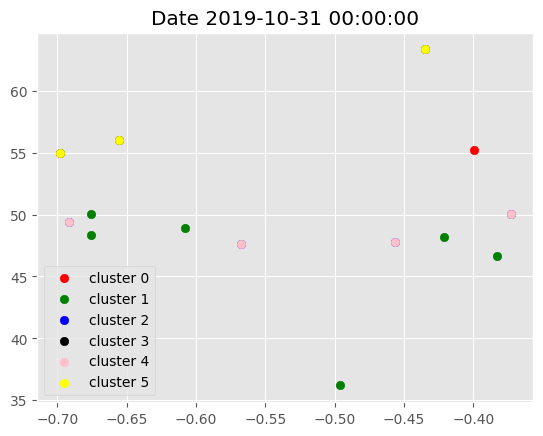

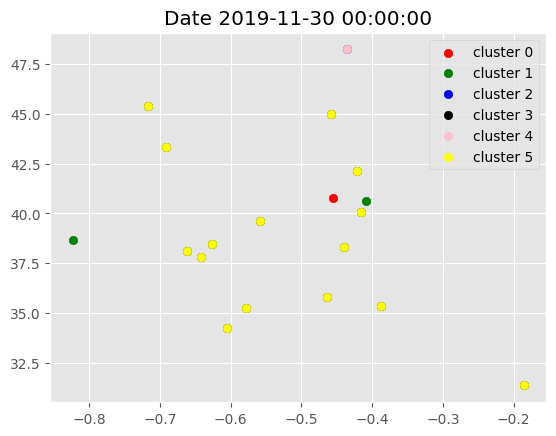

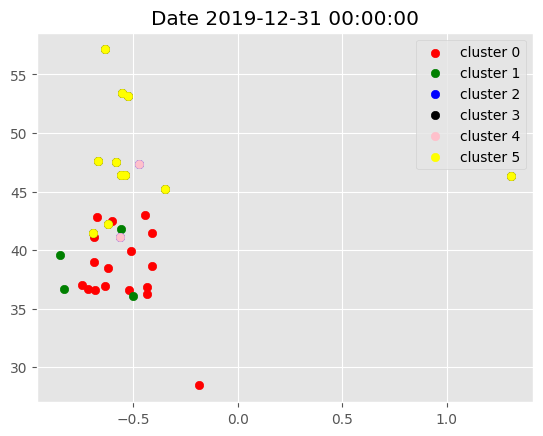

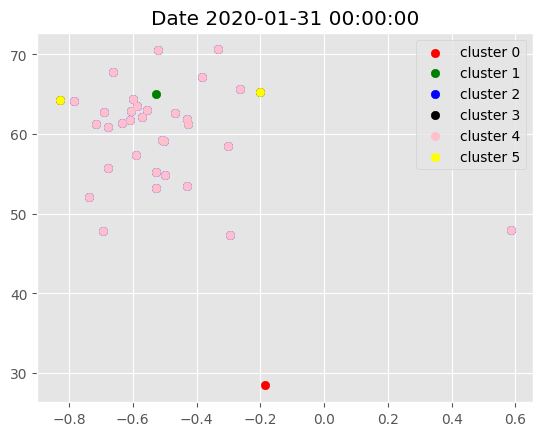

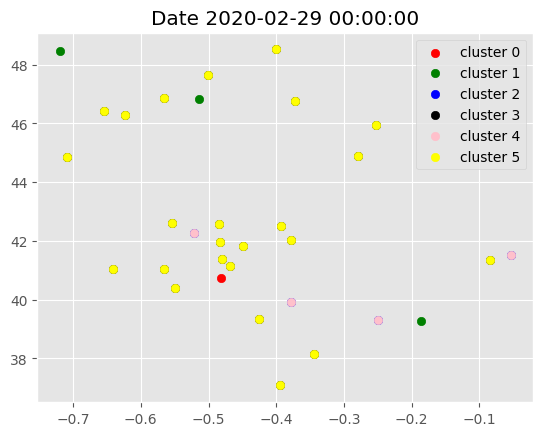

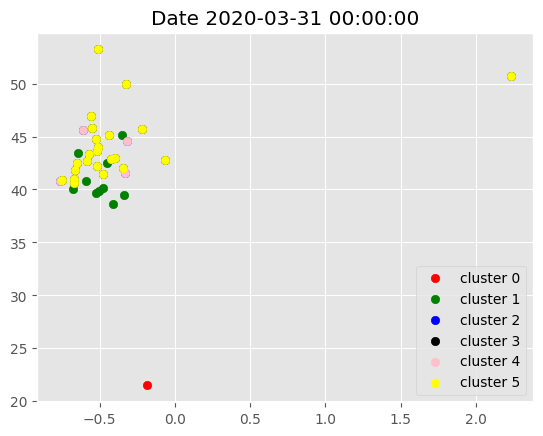

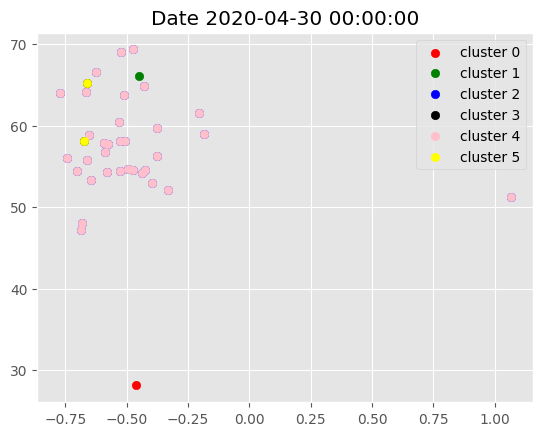

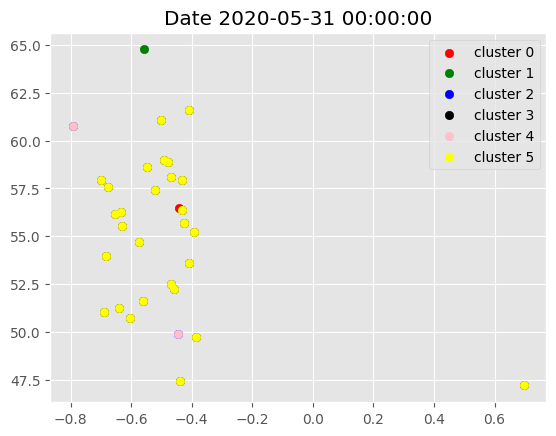

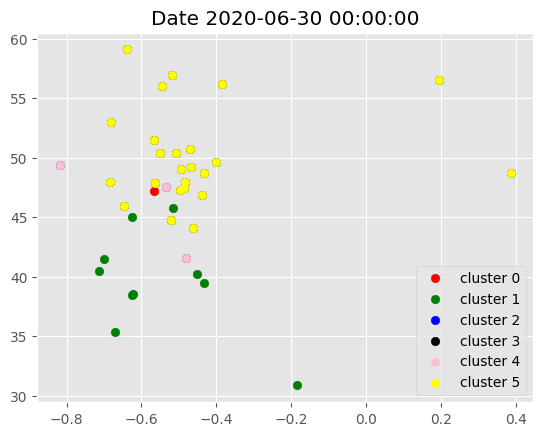

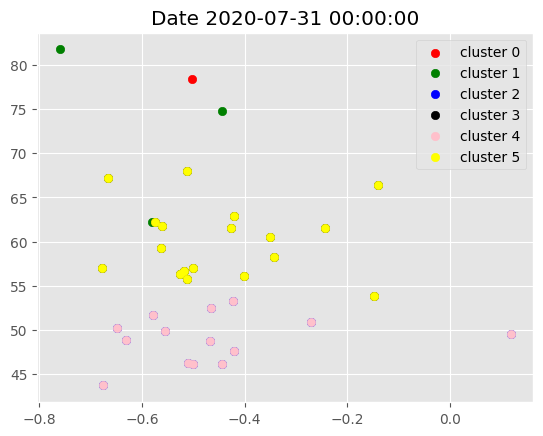

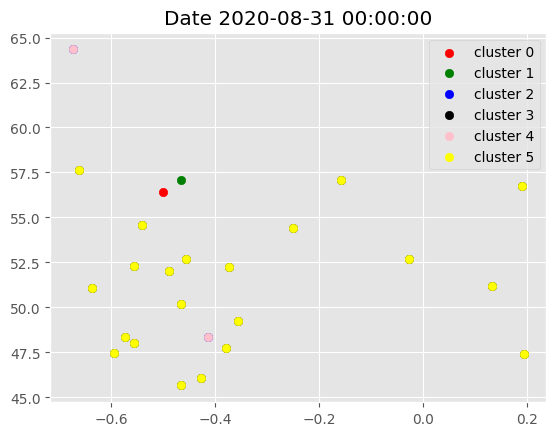

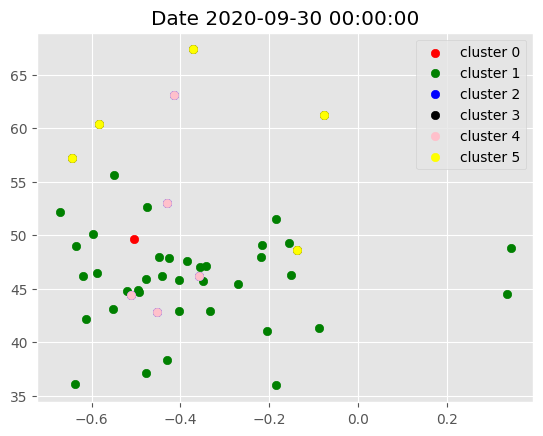

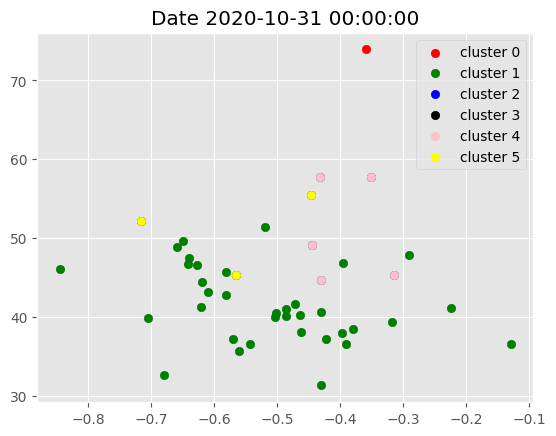

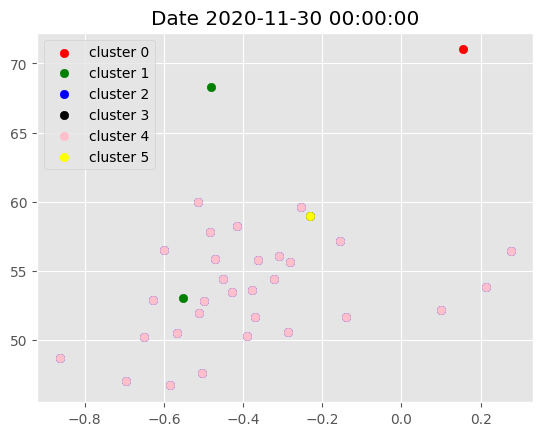

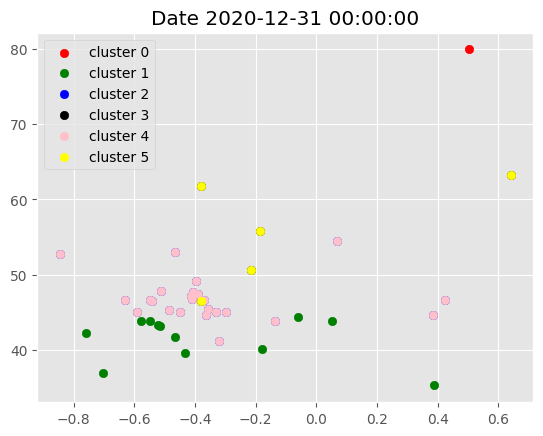

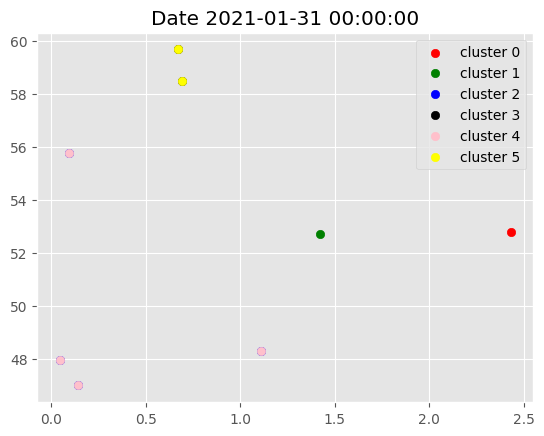

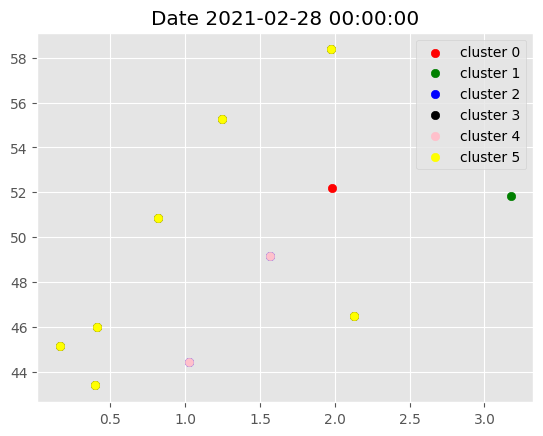

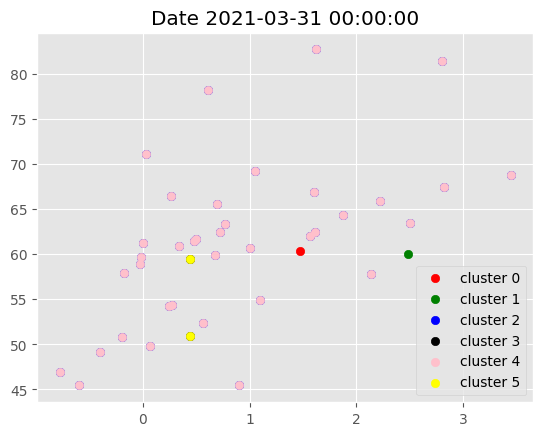

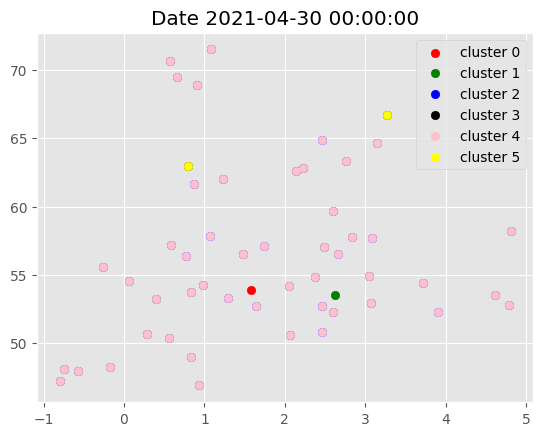

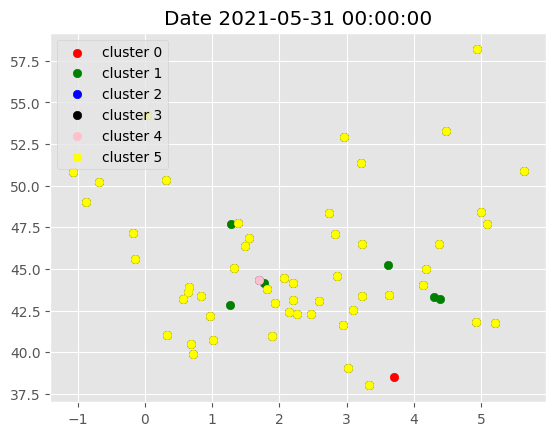

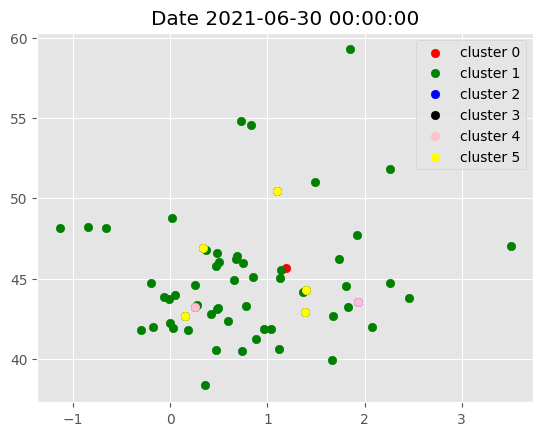

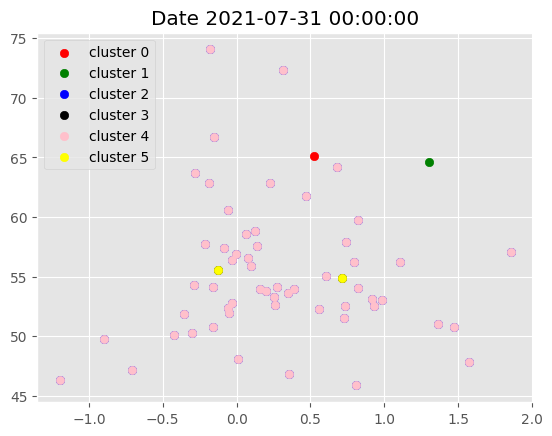

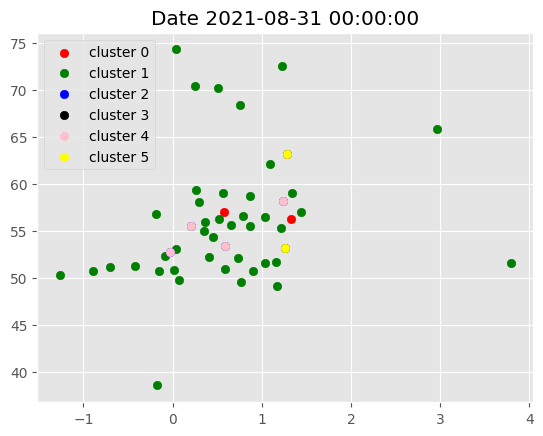

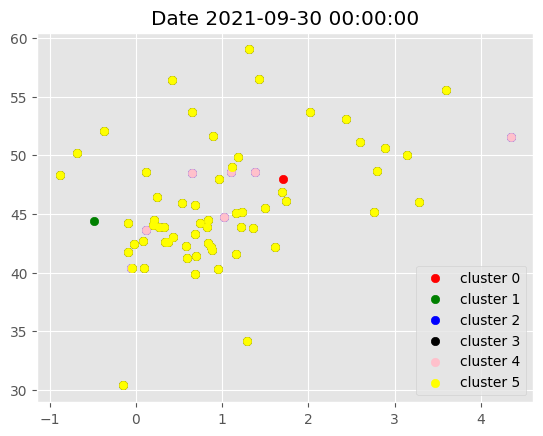

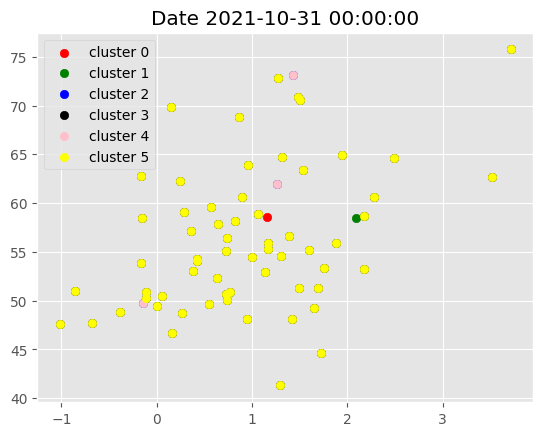

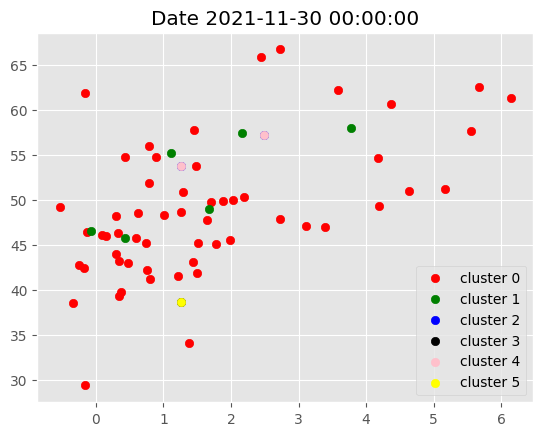

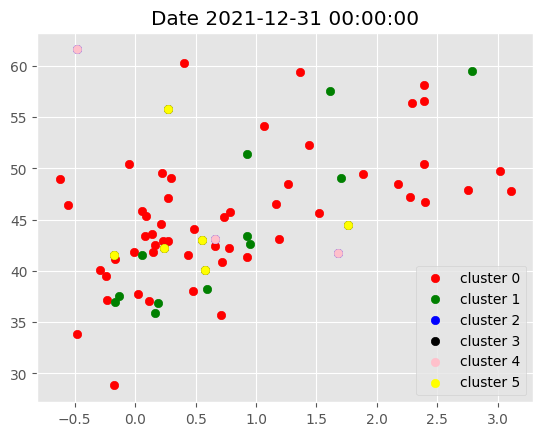

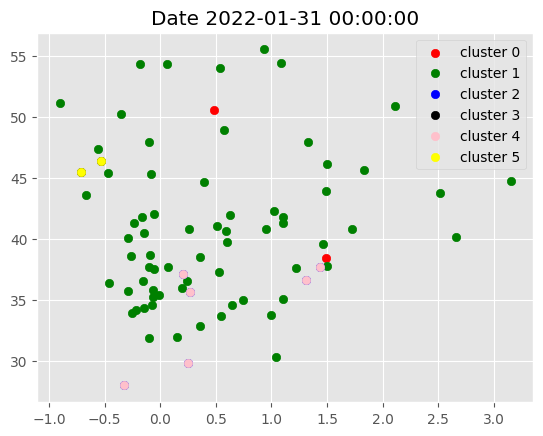

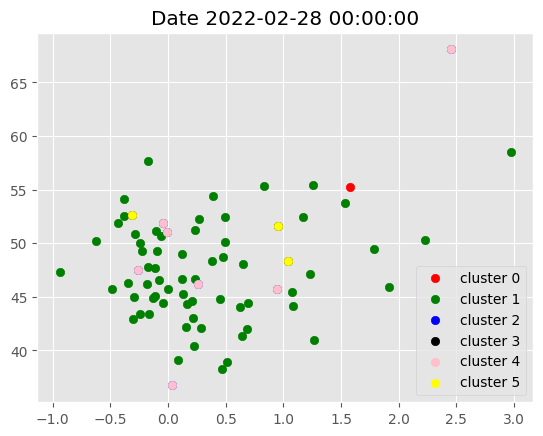

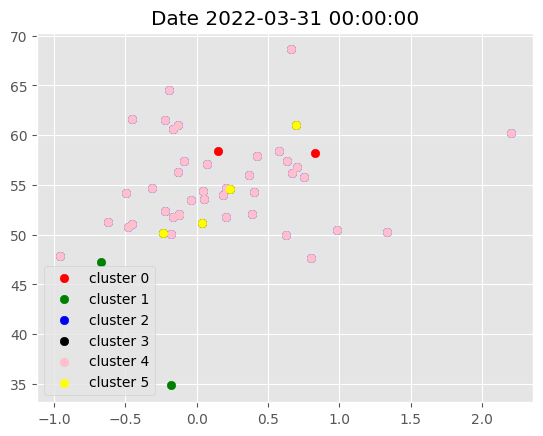

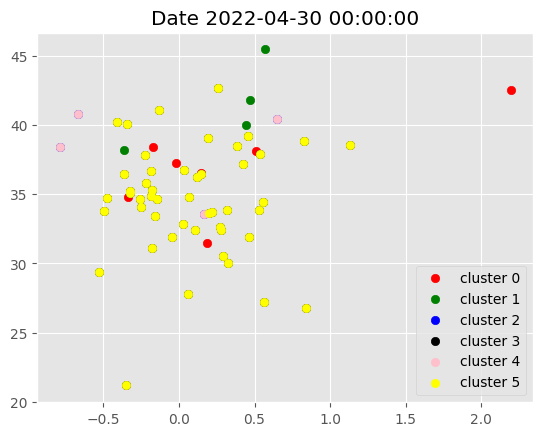

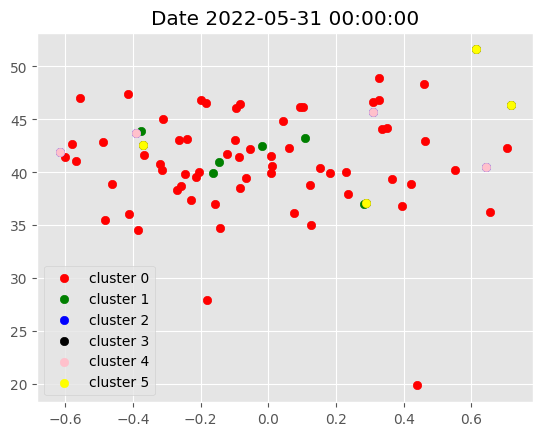

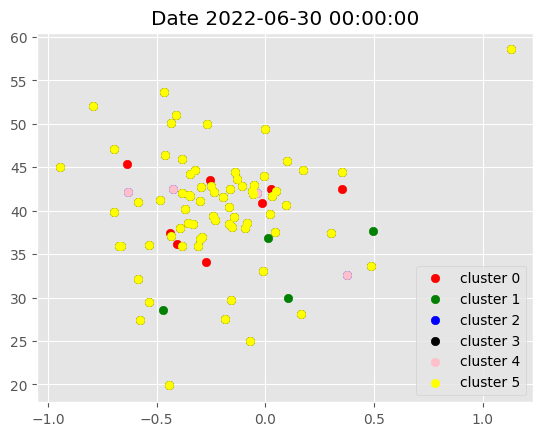

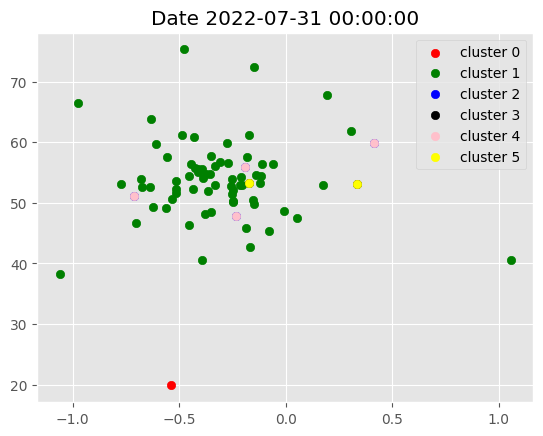

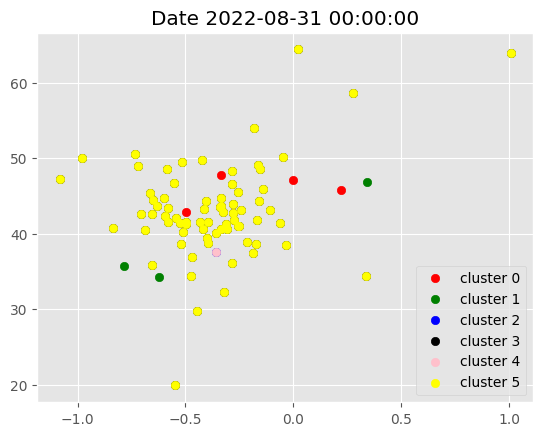

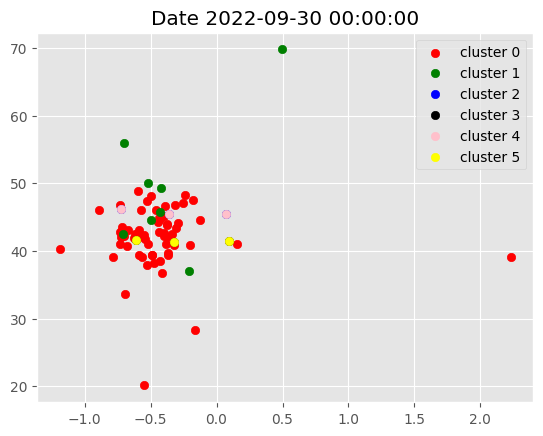

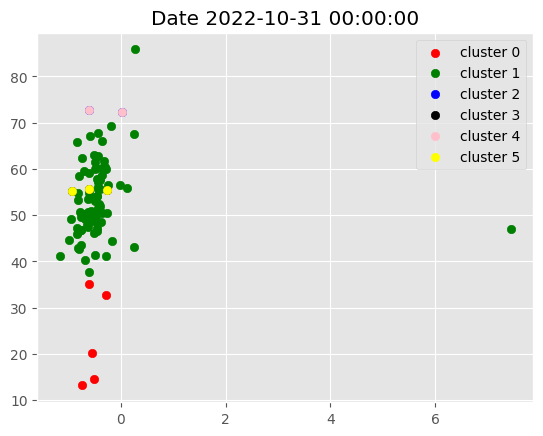

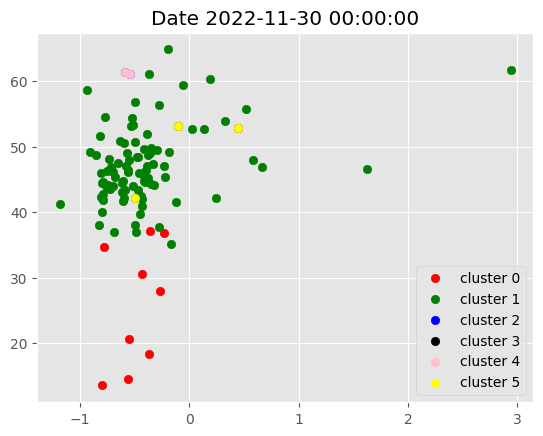

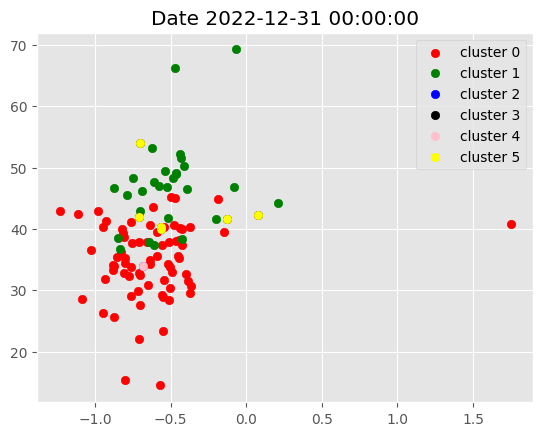

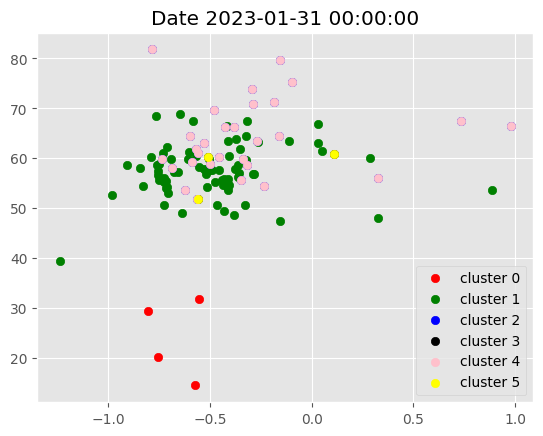

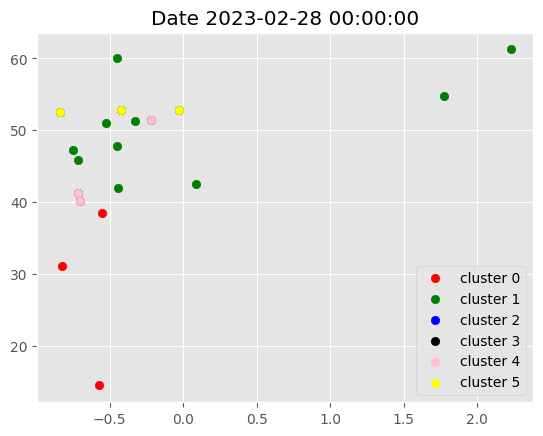

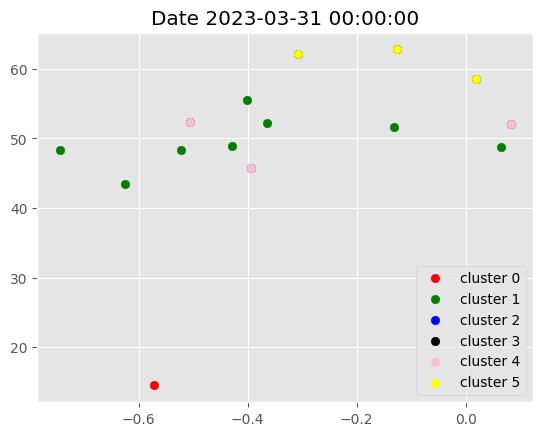

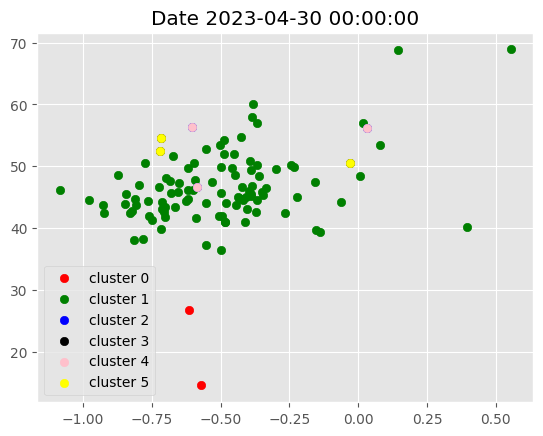

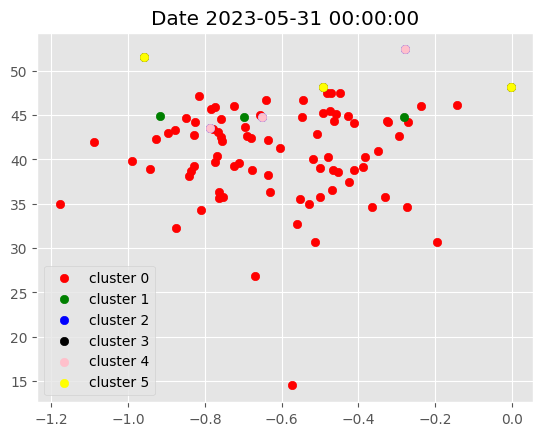

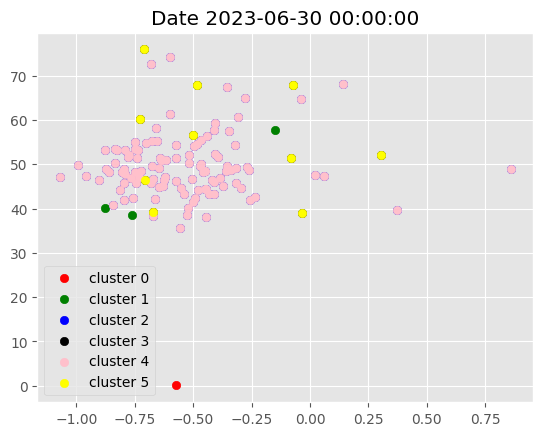

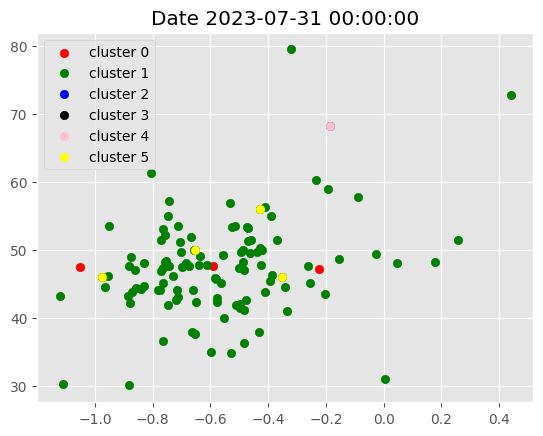

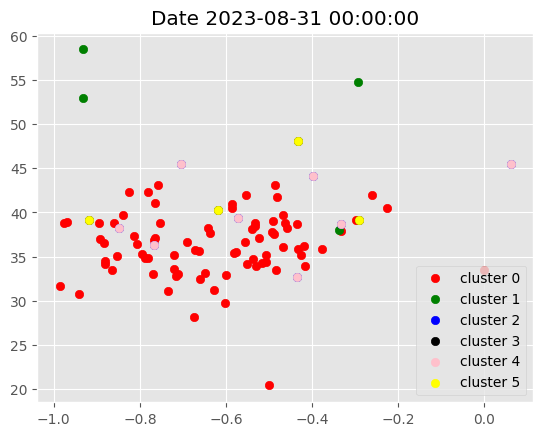

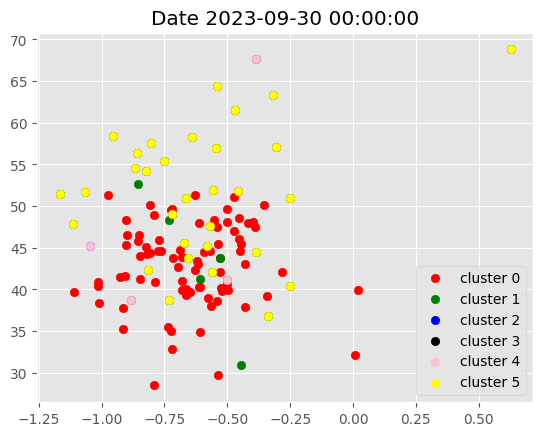

In [21]:
plt.style.use('ggplot')

for i in data.index.get_level_values('date').unique().tolist():
    
    g = data.xs(i, level=0)
    
    plt.title(f'Date {i}')
    
    plot_clusters(g)

In [28]:
filtered_df = data[data['cluster']==0].copy()
# 2 > 3 ; 4 horrible+incomplete; 5,1 is comparable to 2 and 3; 0 worst
filtered_df = filtered_df.reset_index(level=1)

filtered_df.index = filtered_df.index+pd.DateOffset(1)

filtered_df = filtered_df.reset_index().set_index(['date', 'ticker'])

dates = filtered_df.index.get_level_values('date').unique().tolist()

fixed_dates = {}

for d in dates:
    
    fixed_dates[d.strftime('%Y-%m-%d')] = filtered_df.xs(d, level=0).index.tolist()
    
fixed_dates

{'2019-11-01': ['BTC-USD'],
 '2019-12-01': ['BTC-USD'],
 '2020-01-01': ['ADA-USD',
  'ARB-USD',
  'BTG-USD',
  'DOGE-USD',
  'GAS-USD',
  'GNO-USD',
  'KCS-USD',
  'LINK-USD',
  'LRC-USD',
  'QTUM-USD',
  'SC-USD',
  'TRX-USD',
  'XEM-USD',
  'XLM-USD',
  'XRP-USD',
  'ZRX-USD',
  'ELF-USD'],
 '2020-02-01': ['ARB-USD'],
 '2020-03-01': ['BTC-USD'],
 '2020-04-01': ['ARB-USD'],
 '2020-05-01': ['JUP-USD'],
 '2020-06-01': ['BTC-USD'],
 '2020-07-01': ['BTC-USD'],
 '2020-08-01': ['BTC-USD'],
 '2020-09-01': ['BTC-USD'],
 '2020-10-01': ['BTC-USD'],
 '2020-11-01': ['BTC-USD'],
 '2020-12-01': ['BTC-USD'],
 '2021-01-01': ['BTC-USD'],
 '2021-02-01': ['BTC-USD'],
 '2021-03-01': ['WBTC-USD'],
 '2021-04-01': ['WBTC-USD'],
 '2021-05-01': ['WBTC-USD'],
 '2021-06-01': ['BTC-USD'],
 '2021-07-01': ['WBTC-USD'],
 '2021-08-01': ['WBTC-USD'],
 '2021-09-01': ['BTC-USD', 'WBTC-USD'],
 '2021-10-01': ['BTC-USD'],
 '2021-11-01': ['WBTC-USD'],
 '2021-12-01': ['ADA-USD',
  'ARB-USD',
  'BAT-USD',
  'DOGE-USD',
  'EN

In [29]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

def optimize_weights(prices, lower_bound=0):
    
    returns = expected_returns.mean_historical_return(prices=prices,
                                                      frequency=252)
    
    cov = risk_models.sample_cov(prices=prices,
                                 frequency=252)
    
    ef = EfficientFrontier(expected_returns=returns,
                           cov_matrix=cov,
                           weight_bounds=(lower_bound, .1),
                           solver='SCS')
    
    weights = ef.max_sharpe()
    
    return ef.clean_weights()

In [30]:
stocks = data.index.get_level_values('ticker').unique().tolist()

new_df = yf.download(tickers=stocks,
                     start=data.index.get_level_values('date').unique()[0]-pd.DateOffset(months=12),
                     end=data.index.get_level_values('date').unique()[-1])

new_df

[*********************100%%**********************]  133 of 133 completed


Adj Close                                                     \
           1INCH-USD   AAVE-USD   ADA-USD  AGIX-USD   AKT-USD  ALGO-USD   
Date                                                                      
2018-10-31       NaN        NaN  0.069705  0.058127       NaN       NaN   
2018-11-01       NaN        NaN  0.070867  0.061931       NaN       NaN   
2018-11-02       NaN        NaN  0.072584  0.061861       NaN       NaN   
2018-11-03       NaN        NaN  0.071479  0.064545       NaN       NaN   
2018-11-04       NaN        NaN  0.076229  0.072555       NaN       NaN   
...              ...        ...       ...       ...       ...       ...   
2023-09-25  0.264547  62.276684  0.245881  0.177906  0.812265  0.097653   
2023-09-26  0.266652  61.084534  0.245395  0.175306  0.771816  0.095663   
2023-09-27  0.261359  60.622601  0.244791  0.176099  0.783751  0.095617   
2023-09-28  0.269177  65.740623  0.249120  0.179906  0.833905  0.097527   
2023-09-29  0.267048  66.104950  0.249536  0.184934  0.833037  0.101560   

                                                    ...     Volume           \
            API3-USD    AR-USD   ARB-USD  ATOM-USD  ...    XCH-USD  XDC-USD   
Date                                                ...                       
2018-10-31       NaN       NaN  0.001383       NaN  ...        NaN   499180   
2018-11-01       NaN       NaN  0.001392       NaN  ...        NaN   536486   
2018-11-02       NaN       NaN  0.001722       NaN  ...        NaN   549941   
2018-11-03       NaN       NaN  0.001913       NaN  ...        NaN   494933   
2018-11-04       NaN       NaN  0.001866       NaN  ...        NaN   311929   
...              ...       ...       ...       ...  ...        ...      ...   
2023-09-25  1.104339  4.111475  0.826045  7.038658  ...  2277932.0  2771281   
2023-09-26  1.096197  4.151412  0.829417  6.955625  ...  2246231.0  3275515   
2023-09-27  1.154429  4.146664  0.822260  6.967410  ...  2880598.0  3093104   
2023-09-28  1.153681  4.225386  0.871439  7.108081  ...  2994636.0  2889314   
2023-09-29  1.128895  4.238353  0.897662  7.110103  ...  2618435.0  3618455   

                                                                           \
            XEM-USD    XLM-USD   XMR-USD     XRP-USD   XTZ-USD    ZEC-USD   
Date                                                                        
2018-10-31  5823560   42791700  13314200   367008000   2135600   98439900   
2018-11-01  5694120   38696300  10160300   346501000   2314640  106367000   
2018-11-02  6452350   50452100  11916800   401300000   2312990   90126600   
2018-11-03  5212130   50502800  10283100   275311000   1447520   85513200   
2018-11-04  6239750   57585400  14673200   429629000   1626250  100538000   
...             ...        ...       ...         ...       ...        ...   
2023-09-25  8630157   50541695  42685360   852958013  15708829   32748737   
2023-09-26  2720707   39565995  41884784   782380755  11975662   33059159   
2023-09-27  2482563   48532437  46912869   748882159  13483022   35126099   
2023-09-28  2347673   42137987  44650519   786510398  16490984   34466525   
2023-09-29  2759430  110501869  36492709  1721538761  17707466   35962182   

                                
             ZIL-USD   ZRX-USD  
Date                            
2018-10-31   5815280   9953860  
2018-11-01  12706400  12811100  
2018-11-02   9161640  17280400  
2018-11-03   3741450  10377300  
2018-11-04   8186170  15516200  
...              ...       ...  
2023-09-25   9886111  15673166  
2023-09-26   9843525  15314786  
2023-09-27  11076739  12511868  
2023-09-28  11386382  21845730  
2023-09-29  13495345  17040838  

[1795 rows x 798 columns]

In [31]:
returns_dataframe = np.log(new_df['Adj Close']).diff()

portfolio_df = pd.DataFrame()

for start_date in fixed_dates.keys():
    
    try:

        end_date = (pd.to_datetime(start_date)+pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')

        cols = fixed_dates[start_date]

        optimization_start_date = (pd.to_datetime(start_date)-pd.DateOffset(months=12)).strftime('%Y-%m-%d')

        optimization_end_date = (pd.to_datetime(start_date)-pd.DateOffset(days=1)).strftime('%Y-%m-%d')
        
        optimization_df = new_df[optimization_start_date:optimization_end_date]['Adj Close'][cols]
        
        success = False
        try:
            weights = optimize_weights(prices=optimization_df,
                                   lower_bound=round(1/(len(optimization_df.columns)*2),3))

            weights = pd.DataFrame(weights, index=pd.Series(0))
            
            success = True
        except:
            print(f'Max Sharpe Optimization failed for {start_date}, Continuing with Equal-Weights')
        
        if success==False:
            weights = pd.DataFrame([1/len(optimization_df.columns) for i in range(len(optimization_df.columns))],
                                     index=optimization_df.columns.tolist(),
                                     columns=pd.Series(0)).T
        
        temp_df = returns_dataframe[start_date:end_date]

        temp_df = temp_df.stack().to_frame('return').reset_index(level=0)\
                   .merge(weights.stack().to_frame('weight').reset_index(level=0, drop=True),
                          left_index=True,
                          right_index=True)\
                   .reset_index().set_index(['Date', 'index']).unstack().stack()

        temp_df.index.names = ['date', 'ticker']

        temp_df['weighted_return'] = temp_df['return']*temp_df['weight']

        temp_df = temp_df.groupby(level=0)['weighted_return'].sum().to_frame('Strategy Return')

        portfolio_df = pd.concat([portfolio_df, temp_df], axis=0)
    
    except Exception as e:
        print(e)

portfolio_df = portfolio_df.drop_duplicates()

portfolio_df

Max Sharpe Optimization failed for 2019-11-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2019-12-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-02-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-03-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-04-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-05-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-06-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-07-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-08-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-09-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-10-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-11-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-12-01, Continuing with Equal-Weights

,Strategy Return
date,
2019-11-01,0.006665
2019-11-02,0.006845
2019-11-03,-0.009630
2019-11-04,0.019012
2019-11-05,-0.007474
...,...
2023-09-25,0.002701
2023-09-26,-0.007293
2023-09-27,-0.001981


In [32]:
spy = yf.download(tickers='SPY',
                  start='2019-01-01',
                  end=dt.date.today())

spy_ret = np.log(spy[['Adj Close']]).diff().dropna().rename({'Adj Close':'SPY Buy&Hold'}, axis=1)

portfolio_df = portfolio_df.merge(spy_ret,
                                  left_index=True,
                                  right_index=True)

portfolio_df

[*********************100%%**********************]  1 of 1 completed


,Strategy Return,SPY Buy&Hold
2019-11-01,0.006665,0.009221
2019-11-04,0.019012,0.004010
2019-11-05,-0.007474,-0.001107
2019-11-06,0.001962,0.000228
2019-11-07,-0.010019,0.003510
...,...,...
2023-09-25,0.002701,0.004196
2023-09-26,-0.007293,-0.014800
2023-09-27,-0.001981,0.000399
2023-09-28,0.020918,0.005781


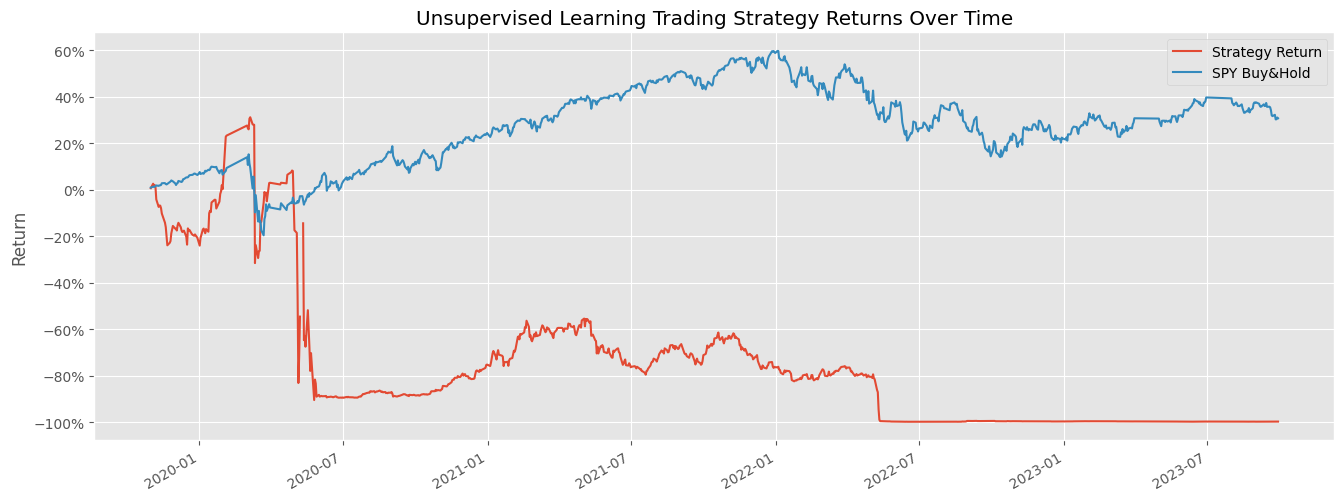

In [33]:
import matplotlib.ticker as mtick

plt.style.use('ggplot')

portfolio_cumulative_return = np.exp(np.log1p(portfolio_df).cumsum())-1

portfolio_cumulative_return[:'2023-09-29'].plot(figsize=(16,6))

plt.title('Unsupervised Learning Trading Strategy Returns Over Time')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel('Return')

plt.show()